### 1.Load Final Metrics

In [52]:
import pandas as pd

summary_df = pd.read_csv("outputs/crypto_clustered.csv", index_col="coin")
summary_df

,avg_return,volatility,avg_sentiment,cluster
coin,,,,
bitcoin,0.001704,0.026143,55.05,0
ethereum,0.000007,0.038671,55.05,0
solana,0.001341,0.045597,55.05,0
cardano,0.003152,0.061690,55.05,1


### 2.Normalize Scores

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize selected columns
normalized = scaler.fit_transform(summary_df[['avg_return', 'volatility', 'avg_sentiment']])

# Create new DataFrame from normalized values
normalized_df = pd.DataFrame(
    normalized,
    columns=['norm_avg_return', 'norm_volatility', 'norm_avg_sentiment'],
    index=summary_df.index
)



### 3.Assign Weights & Final Ranking Score

In [54]:
# Remove duplicated columns by keeping only the first occurrence
summary_df = summary_df.loc[:, ~summary_df.columns.duplicated()]


In [55]:
print(summary_df[['norm_avg_return', 'norm_volatility', 'norm_avg_sentiment']].head())

          norm_avg_return  norm_volatility  norm_avg_sentiment
coin                                                          
bitcoin          0.539500         0.000000                 0.0
ethereum         0.000000         0.352438                 0.0
solana           0.424148         0.547292                 0.0
cardano          1.000000         1.000000                 0.0


In [85]:
# Define weights
w1, w2, w3 = 0.4, 0.3, 0.3

# Double check all necessary normalized columns exist
assert all(col in summary_df.columns for col in ['norm_avg_return', 'norm_volatility', 'norm_avg_sentiment']), "Missing normalized columns!"

# Calculate ranking_score
summary_df['ranking_score'] = (
    w1 * summary_df['norm_avg_return']
    - w2 * summary_df['norm_volatility']
    + w3 * summary_df['norm_avg_sentiment']
)

# Show that the column now exists
print(summary_df[['ranking_score']])


               ranking_score
coin                        
bitcoin             0.215800
ethereum           -0.105732
solana              0.005472
cardano             0.100000
ranking_score            NaN


### 4.Visualize Top Recommended Cryptos

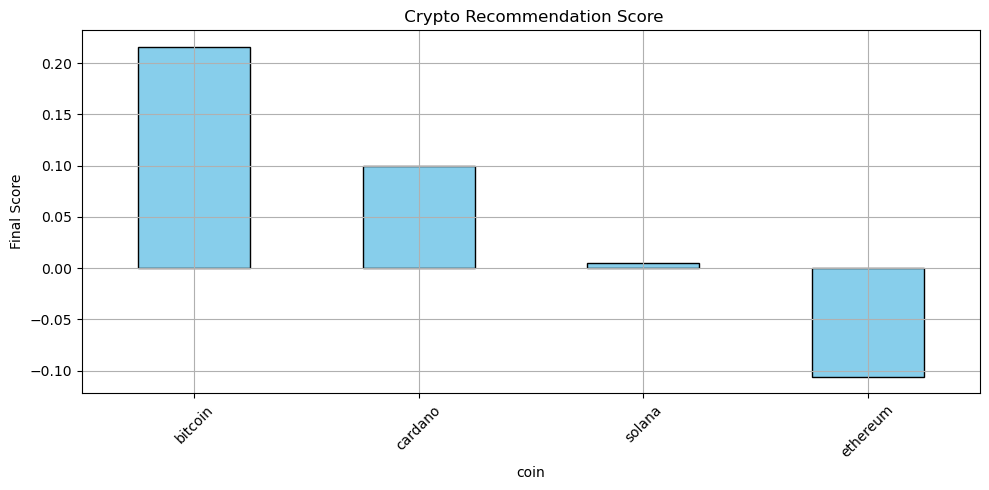

In [88]:
# Clean invalid row (if index is 'ranking_score')
summary_df = summary_df[summary_df.index != "ranking_score"]

# Sort and plot
summary_df = summary_df.sort_values(by="ranking_score", ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
summary_df["ranking_score"].plot(kind='bar', title=" Crypto Recommendation Score", color="skyblue", edgecolor='black')
plt.ylabel("Final Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 5.Save Final Table

In [90]:
summary_df.to_csv("outputs/final_crypto_recommendations.csv")
print("✅ Saved final recommendations!")


✅ Saved final recommendations!


###  Optional Recommendation Printout

In [93]:
best_coin = summary_df.index[0]
print(f"🔮 Recommended Crypto: **{best_coin.upper()}**")
print(f"\nReason:\n- Highest ranking score ({summary_df.loc[best_coin, 'ranking_score']:.2f})\n- Low volatility\n- Strong returns\n- Positive sentiment")


🔮 Recommended Crypto: **BITCOIN**

Reason:
- Highest ranking score (0.22)
- Low volatility
- Strong returns
- Positive sentiment
